# Support Vector Machines  
### implemented with sklearn (sci-kit learn), Python

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [12]:
import sklearn
from sklearn import datasets
from sklearn import svm

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [135]:
import nltk

In [4]:
import numpy as np
import scipy

In [5]:
import re
import os, sys
print(os.getcwd())
os.listdir( os.getcwd()+"/ex6/" ) 

/home/topolo/PropD/MLgrabbag/coursera_Ng/machine-learning-ex6


['gaussianKernel.m',
 'submit.m',
 'token.mat',
 'visualizeBoundaryLinear.m',
 'plotData.m',
 'porterStemmer.m',
 'ex6data1.mat',
 'spamTest.mat',
 'readFile.m',
 'svmTrain.m',
 'linearKernel.m',
 'spamTrain.mat',
 'svmPredict.m',
 'ex6.m',
 'emailSample1.txt',
 'vocab.txt',
 'spamSample1.txt',
 'lib',
 'emailFeatures.m',
 'ex6data3.mat',
 'ex6data2.mat',
 'ex6_spam.m',
 'processEmail.m',
 'getVocabList.m',
 'spamSample2.txt',
 'visualizeBoundary.m',
 'emailSample2.txt',
 'dataset3Params.m']

In [99]:
# Import BeautifulSoup into your workspace
from bs4 import BeautifulSoup    

## Following `ex6.pdf` of Programming Exercise 6: Support Vector Machines of Coursera's Machine Learning Introduction by Andrew Ng 

### Part 1: Loading and Visualizing Data  
We start the exercise by first loading and visualizing the dataset.  
The following code will load the dataset into your environmenet and plot the data.

In [6]:
# Load saved matrices from file 
ex6data1_mat_data = scipy.io.loadmat( os.getcwd()+"/ex6/ex6data1.mat")
print(type(ex6data1_mat_data))
print(ex6data1_mat_data.keys())

<type 'dict'>
['y', 'X', '__version__', '__header__', '__globals__']


In [17]:
print(type(ex6data1_mat_data["y"]))
print(ex6data1_mat_data['y'].shape)
print(type(ex6data1_mat_data["X"]))
print(ex6data1_mat_data['X'].shape)


<type 'numpy.ndarray'>
(51, 1)
<type 'numpy.ndarray'>
(51, 2)


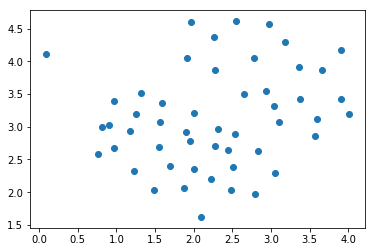

In [21]:
plt.scatter( ex6data1_mat_data['X'][:,0] ,ex6data1_mat_data['X'][:,1] )

In [22]:
y=ex6data1_mat_data['y']

In [25]:
np.where(y==1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 50]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

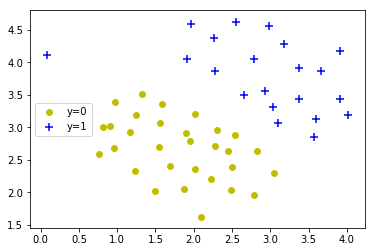

In [31]:
# these are the x-coordinates of the X input data such that y=1
# ex6data1_mat_data['X'][np.where(y==1),0] 
# and so 

plt.scatter( ex6data1_mat_data['X'][np.where(y==0)[0],0], ex6data1_mat_data['X'][np.where(y==0)[0],1] ,
            s=35,c='y',marker='o' , label='y=0' )
plt.scatter( ex6data1_mat_data['X'][np.where(y==1)[0],0], ex6data1_mat_data['X'][np.where(y==1)[0],1] ,
            s=75,c='b',marker='+' , label='y=1' )
plt.legend(loc=6)
plt.show()

### Part 2: Training Linear SVM  
The following code will train a linear SVM on the dataset and plot the decision boundary learned

#### Load from `ex6data1`

In [8]:
ex6data1_mat_data = scipy.io.loadmat( os.getcwd()+"/ex6/ex6data1.mat")
print(type(ex6data1_mat_data))
print(ex6data1_mat_data.keys())

<type 'dict'>
['y', 'X', '__version__', '__header__', '__globals__']


In [9]:
print("\nTraining Linear SVM ...\n")


Training Linear SVM ...



You should try to change the $C$ value below and see how the decision boundary varies (e.g., try $C=1000$)

In [10]:
C=1

In [13]:
clf=svm.SVC()  # C=1. default, kernel='rbl' default, gamma : float, (default='auto') 
                # if gamma is 'auto' then 1/n_features will be used instead

cf. [sklearn.svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.fit)  
`fit(X,y,sample_weight=None)`   
X : (array-like, sparse matrix), shape(`n_samples,n_features`),   
y : array-like,shape(`n_samples`)

In [15]:
print( ex6data1_mat_data['X'].shape )
print( ex6data1_mat_data['y'].shape )

(51, 2)
(51, 1)


In [18]:
clf.fit( ex6data1_mat_data['X'], ex6data1_mat_data['y'].flatten())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
# get support vectors
clf.support_vectors_

array([[ 2.0103  ,  3.2039  ],
       [ 2.3099  ,  2.9584  ],
       [ 2.8283  ,  2.6309  ],
       [ 3.0473  ,  2.2931  ],
       [ 0.9735  ,  3.3881  ],
       [ 1.3191  ,  3.5109  ],
       [ 2.5403  ,  2.8867  ],
       [ 2.2753  ,  3.8589  ],
       [ 3.5772  ,  2.856   ],
       [ 3.1048  ,  3.0709  ],
       [ 1.9182  ,  4.0534  ],
       [ 2.6555  ,  3.5008  ],
       [ 3.0357  ,  3.3165  ],
       [ 0.086405,  4.1045  ]])

In [20]:
# get indices of support vectors
clf.support_

array([21, 24, 25, 26, 40, 42, 47,  1,  4, 11, 12, 14, 19, 50], dtype=int32)

In [21]:
# get number of support vectors for each class
clf.n_support_

array([7, 7], dtype=int32)

##### Plotting
cf. [Plot different SVM classifiers in the iris dataset](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html)

(74250,)


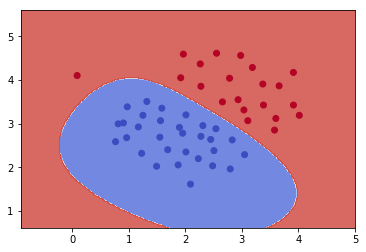

In [31]:
h=.02 # step size in the mesh

# create a mesh to plot in
X = ex6data1_mat_data['X']
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])  # translates slice objects to concatenation along the second axis
print(Z.shape)
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:,0],X[:,1],c=ex6data1_mat_data['y'], cmap=plt.cm.coolwarm)

In [32]:
print(xx.shape); print(Z.shape)

(250, 297)
(250, 297)


In [33]:
clf_lin=svm.SVC(kernel='linear',C=C).fit(ex6data1_mat_data['X'], ex6data1_mat_data['y'].flatten())

(74250,)


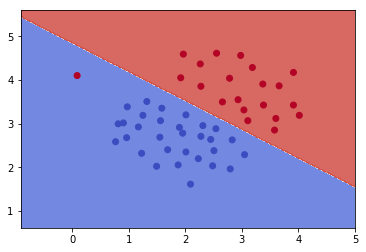

In [34]:
h=.02 # step size in the mesh

# create a mesh to plot in
X = ex6data1_mat_data['X']
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

Z = clf_lin.predict(np.c_[xx.ravel(),yy.ravel()])  # translates slice objects to concatenation along the second axis
print(Z.shape)
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:,0],X[:,1],c=ex6data1_mat_data['y'], cmap=plt.cm.coolwarm)

In [44]:
C_lst = [0.01,0.1,1.,100.]

In [45]:
clf_lst = [svm.SVC(kernel='linear',C=C).fit(ex6data1_mat_data['X'], ex6data1_mat_data['y'].flatten()) for C in C_lst]

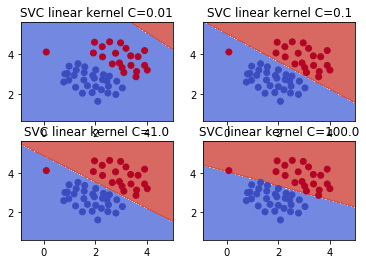

In [46]:
h=.02 # step size in the mesh

# create a mesh to plot in
X = ex6data1_mat_data['X']
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

# title for the plots
titles = ['SVC linear kernel C='+str(C) for C in C_lst]

for i, clf in enumerate(clf_lst):
    # Plot the decision boundary.  For that, we'll assign a color to each 
    # point in the mesh [x_min, x_max]x[y_min, y_max]
    plt.subplot(2,2,i+1)
    
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot 
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Plot also the training points
    plt.scatter(X[:,0], X[:,1],c=ex6data1_mat_data['y'], cmap=plt.cm.coolwarm)
    plt.title(titles[i])

plt.show()
    



In [39]:
titles

['SVC linear kernel C=0.01',
 'SVC linear kernel C=0.1',
 'SVC linear kernel C=1.0',
 'SVC linear kernel C=10.0']

### Part 3: Implementing Gaussian Kernel
*You will now implement the Gaussian kernel to use with the SVM.  You should complete the code in `gaussianKernel.m`*

In [37]:
x1=np.array([1,2,1])
x2=np.array([0,4,-1])
sigma=2

In [42]:
sum( -(x1-x2)**2 )/(2.*2**2)

-1.125

In [44]:
np.exp( sum( -(x1-x2)**2 )/(2.*2**2) ) # 

0.32465246735834974

In [45]:
def gaussianKernel(x1,x2,sigma):
    """ gaussianKernel : returns a gaussian kernel between x1 and x2 and returns the value in sim 
    """
    
    # You need to return the following variables correctly.
    sim = 0
    
    sim = np.exp( -np.sum((x1-x2)**2/(2.*sigma**2)))
    return sim
    

In [46]:
gaussianKernel(x1,x2,sigma)

0.32465246735834974

#### 1.2.2 Example Dataset 2, 1.2.3 Example Dataset 3

In [47]:
# Load saved matrices from file 
ex6data2_mat_data = scipy.io.loadmat( os.getcwd()+"/ex6/ex6data2.mat")
print(type(ex6data2_mat_data))
print(ex6data2_mat_data.keys())
ex6data3_mat_data = scipy.io.loadmat( os.getcwd()+"/ex6/ex6data3.mat")
print(type(ex6data3_mat_data))
print(ex6data3_mat_data.keys())  # Xval, yval are CROSS VALIDATION set data

<type 'dict'>
['y', 'X', '__version__', '__header__', '__globals__']
<type 'dict'>
['yval', '__header__', '__globals__', 'Xval', 'y', 'X', '__version__']


### Part 4: Visualizing Dataset 2   
The following code will load the next dataset into your environment and plot the data.   

(863, 2)


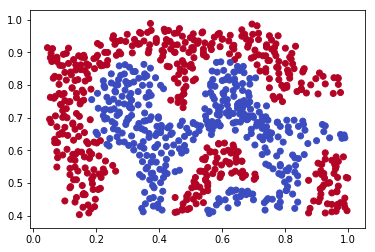

In [48]:
X = ex6data2_mat_data['X']
print(X.shape)
plt.scatter(X[:,0],X[:,1],c=ex6data2_mat_data['y'], cmap=plt.cm.coolwarm)

#### Part 5: Training SVM with RBF Kernel (Dataset 2)  
After you have implemented the kernel, we can now use it to train the SVM classifier.  

In [58]:
C=1.
sigma=0.1
gamma_gaussiankernel = 1./(2.*sigma**2)  # I'm supposing that sci-kit learn SVC's gamma = 1/(2*sigma^2)
clf=svm.SVC(kernel='rbf',C=C,gamma=gamma_gaussiankernel)

In [59]:
clf.fit( ex6data2_mat_data['X'], ex6data2_mat_data['y'].flatten())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=50.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(2320,)


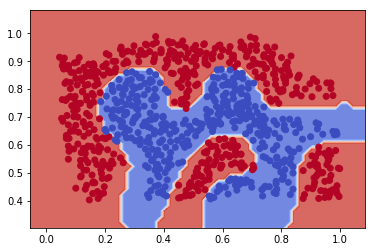

In [60]:
h=.02 # step size in the mesh

# create a mesh to plot in
X = ex6data2_mat_data['X']
x_min, x_max = X[:,0].min()-.1, X[:,0].max()+.1
y_min, y_max = X[:,1].min()-.1, X[:,1].max()+.1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])  # translates slice objects to concatenation along the second axis
print(Z.shape)
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:,0],X[:,1],c=ex6data2_mat_data['y'], cmap=plt.cm.coolwarm)

In [67]:
X = ex6data3_mat_data['X']
y = ex6data3_mat_data['y']
Xval = ex6data3_mat_data['Xval']
yval = ex6data3_mat_data['yval']

C_lst = [0.0001,0.001,0.003,0.01,0.03,0.1,0.3,1.,10.]
sigma_lst = [0.0001,0.001,0.003,0.01,0.03,0.1,0.3,1.,10.]
models = [ [svm.SVC(kernel='rbf',
                   C=C,
                   gamma=1./(2.*sigma**2)).fit(X,
                                               y.flatten()) for C in C_lst] for sigma in sigma_lst]

In [65]:
ex6data3_mat_data.keys()

['yval', '__header__', '__globals__', 'Xval', 'y', 'X', '__version__']

In [75]:
(models[0][0].predict(Xval) != yval).astype('int').mean()

0.56499999999999995

In [76]:
predict_errs = np.array( [[(model.predict(Xval)!=yval).astype('int').mean() for model in rowmodel] for rowmodel in models] )

In [93]:
predict_errs

array([[ 0.565  ,  0.565  ,  0.565  ,  0.565  ,  0.565  ,  0.565  ,
         0.565  ,  0.565  ,  0.565  ],
       [ 0.565  ,  0.565  ,  0.565  ,  0.565  ,  0.565  ,  0.565  ,
         0.565  ,  0.56435,  0.56435],
       [ 0.565  ,  0.565  ,  0.565  ,  0.565  ,  0.565  ,  0.565  ,
         0.565  ,  0.5598 ,  0.55915],
       [ 0.565  ,  0.565  ,  0.565  ,  0.565  ,  0.565  ,  0.565  ,
         0.565  ,  0.5351 ,  0.53315],
       [ 0.565  ,  0.565  ,  0.565  ,  0.565  ,  0.565  ,  0.565  ,
         0.5182 ,  0.4857 ,  0.48765],
       [ 0.565  ,  0.565  ,  0.565  ,  0.565  ,  0.56305,  0.4896 ,
         0.49285,  0.4922 ,  0.49025],
       [ 0.565  ,  0.565  ,  0.565  ,  0.565  ,  0.49415,  0.49155,
         0.4909 ,  0.4922 ,  0.4909 ],
       [ 0.565  ,  0.565  ,  0.565  ,  0.565  ,  0.53835,  0.4974 ,
         0.49415,  0.4896 ,  0.4883 ],
       [ 0.565  ,  0.565  ,  0.565  ,  0.565  ,  0.565  ,  0.565  ,
         0.565  ,  0.565  ,  0.4961 ]])

In [92]:
predict_errs[predict_errs.argmin() // 9 , predict_errs.argmin() % 9]

0.48570000000000002

In [90]:
print( sigma_lst[predict_errs.argmin()//9] )
print( C_lst[predict_errs.argmin() % 9] )

0.03
1.0


Indeed

In [88]:
C=1.0
sigma=0.03
clf = svm.SVC(kernel='rbf',C=C,gamma=1./(2.*sigma**2)).fit(X,y.flatten())

In [89]:
(clf.predict(Xval) != yval).astype('int').mean()

0.48570000000000002

## Spam Classification (2. Spam Classification of `ex6`)

### Part 1: Email Preprocessing  
To use an SVM to classify emails into Spam vs. Non-Spam, you first need to convert each email into a vector of features.  In this part, you will implement the preprocessing steps for each email.  

In [95]:
# Extract Features
f = open(os.getcwd()+"/ex6/emailSample1.txt",'r')
file_contents = f.read()
f.close()


In [96]:
file_contents

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

In [97]:
# Lower case
file_contents.lower()

"> anyone knows how much it costs to host a web portal ?\n>\nwell, it depends on how many visitors you're expecting.\nthis can be anywhere from less than 10 bucks a month to a couple of $100. \nyou should checkout http://www.rackspace.com/ or perhaps amazon ec2 \nif youre running something big..\n\nto unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

In [100]:
# Strip all HTML
# Looks for any expression that starts with < and ends with > and replace 
# and does not have any < or > in the tag it with a space
BeautifulSoup( file_contents.lower() )
BeautifulSoup( file_contents.lower() ).get_text()

# Calling get_text() gives you the text of the review, without tags or markup.
# cf. https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words

/home/topolo/Public/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


u"> anyone knows how much it costs to host a web portal ?\n>\nwell, it depends on how many visitors you're expecting.\nthis can be anywhere from less than 10 bucks a month to a couple of $100. \nyou should checkout http://www.rackspace.com/ or perhaps amazon ec2 \nif youre running something big..\n\nto unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

In [102]:
import re
# Use regular expressions to do a find-and-replace
# Handle Numbers
# look for 1 or more characters between 0-9
email_contents = re.sub("[0-9]+",           # The pattern to search for
                      "number",                   # The pattern to replace it with
                      BeautifulSoup( file_contents.lower() ).get_text() )  # The text to search

In [103]:
# Handle URLS
# Look for strings starting with http:// or https://
re.sub( '(http|https)://[^\s]*','httpaddr',email_contents)

u"> anyone knows how much it costs to host a web portal ?\n>\nwell, it depends on how many visitors you're expecting.\nthis can be anywhere from less than number bucks a month to a couple of $number. \nyou should checkout httpaddr or perhaps amazon ecnumber \nif youre running something big..\n\nto unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

In [104]:
# Handle Email Addresses
# Look for strings with @ in the middle
re.sub( '[^\s]+@[^\s]+','emailaddr', email_contents)

u"> anyone knows how much it costs to host a web portal ?\n>\nwell, it depends on how many visitors you're expecting.\nthis can be anywhere from less than number bucks a month to a couple of $number. \nyou should checkout http://www.rackspace.com/ or perhaps amazon ecnumber \nif youre running something big..\n\nto unsubscribe yourself from this mailing list, send an email to:\nemailaddr\n\n"

In [105]:
# Handle $ sign
re.sub('[$]+','dollar', email_contents)

u"> anyone knows how much it costs to host a web portal ?\n>\nwell, it depends on how many visitors you're expecting.\nthis can be anywhere from less than number bucks a month to a couple of dollarnumber. \nyou should checkout http://www.rackspace.com/ or perhaps amazon ecnumber \nif youre running something big..\n\nto unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

In [119]:
def processEmail_regex(email_contents):
    """ processEmail_regex - process email with regular expressions, 1st.
    """
    # Lower case
    email_contents = email_contents.lower()
    
    # Strip all HTML
    # Looks for any expression that starts with < and ends with > and replace 
    # and does not have any < or > in the tag it with a space
    email_contents = BeautifulSoup( email_contents,"lxml" ).get_text()
    
    # Use regular expressions to do a find-and-replace
    # Handle Numbers
    # look for 1 or more characters between 0-9
    email_contents = re.sub("[0-9]+",           # The pattern to search for
                      "number",                   # The pattern to replace it with
                      email_contents )  # The text to search
    
    # Handle URLS
    # Look for strings starting with http:// or https://
    email_contents = re.sub( '(http|https)://[^\s]*','httpaddr',email_contents)
    
    # Handle Email Addresses
    # Look for strings with @ in the middle
    email_contents = re.sub( '[^\s]+@[^\s]+','emailaddr', email_contents)
    
    # Handle $ sign
    email_contents = re.sub('[$]+','dollar', email_contents)
    
    # Remove any non alphanumeric characters
    email_contents = re.sub('[^a-zA-Z0-9]',' ', email_contents)
    
    return email_contents
    

In [120]:
f = open(os.getcwd()+"/ex6/emailSample1.txt",'r')
file_contents = f.read()
f.close()
email_contents = processEmail_regex(file_contents)

In [121]:
email_contents

u'  anyone knows how much it costs to host a web portal     well  it depends on how many visitors you re expecting  this can be anywhere from less than number bucks a month to a couple of dollarnumber   you should checkout httpaddr or perhaps amazon ecnumber  if youre running something big    to unsubscribe yourself from this mailing list  send an email to  emailaddr  '

In [111]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [126]:
test_email_vec = count_vect.fit_transform( [email_contents,])

In [129]:
print( type(test_email_vec) ); 
print( test_email_vec.shape )

<class 'scipy.sparse.csr.csr_matrix'>
(1, 51)


In [133]:
test_email_vec[0][0]

<1x51 sparse matrix of type '<type 'numpy.int64'>'
	with 51 stored elements in Compressed Sparse Row format>

In [ ]:
import nltk

In [138]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [151]:
tokens_email_contents = nltk.word_tokenize(email_contents)

In [137]:
email_contents

u'  anyone knows how much it costs to host a web portal     well  it depends on how many visitors you re expecting  this can be anywhere from less than number bucks a month to a couple of dollarnumber   you should checkout httpaddr or perhaps amazon ecnumber  if youre running something big    to unsubscribe yourself from this mailing list  send an email to  emailaddr  '

In [152]:
tokens_email_contents

[u'anyone',
 u'knows',
 u'how',
 u'much',
 u'it',
 u'costs',
 u'to',
 u'host',
 u'a',
 u'web',
 u'portal',
 u'well',
 u'it',
 u'depends',
 u'on',
 u'how',
 u'many',
 u'visitors',
 u'you',
 u're',
 u'expecting',
 u'this',
 u'can',
 u'be',
 u'anywhere',
 u'from',
 u'less',
 u'than',
 u'number',
 u'bucks',
 u'a',
 u'month',
 u'to',
 u'a',
 u'couple',
 u'of',
 u'dollarnumber',
 u'you',
 u'should',
 u'checkout',
 u'httpaddr',
 u'or',
 u'perhaps',
 u'amazon',
 u'ecnumber',
 u'if',
 u'youre',
 u'running',
 u'something',
 u'big',
 u'to',
 u'unsubscribe',
 u'yourself',
 u'from',
 u'this',
 u'mailing',
 u'list',
 u'send',
 u'an',
 u'email',
 u'to',
 u'emailaddr']

In [153]:
tagged_email_contents = nltk.pos_tag( tokens_email_contents )

In [154]:
tagged_email_contents

[(u'anyone', 'NN'),
 (u'knows', 'VBZ'),
 (u'how', 'WRB'),
 (u'much', 'JJ'),
 (u'it', 'PRP'),
 (u'costs', 'VBZ'),
 (u'to', 'TO'),
 (u'host', 'VB'),
 (u'a', 'DT'),
 (u'web', 'NN'),
 (u'portal', 'NN'),
 (u'well', 'NN'),
 (u'it', 'PRP'),
 (u'depends', 'VBZ'),
 (u'on', 'IN'),
 (u'how', 'WRB'),
 (u'many', 'JJ'),
 (u'visitors', 'NNS'),
 (u'you', 'PRP'),
 (u're', 'VBP'),
 (u'expecting', 'VBG'),
 (u'this', 'DT'),
 (u'can', 'MD'),
 (u'be', 'VB'),
 (u'anywhere', 'RB'),
 (u'from', 'IN'),
 (u'less', 'JJR'),
 (u'than', 'IN'),
 (u'number', 'NN'),
 (u'bucks', 'NNS'),
 (u'a', 'DT'),
 (u'month', 'NN'),
 (u'to', 'TO'),
 (u'a', 'DT'),
 (u'couple', 'NN'),
 (u'of', 'IN'),
 (u'dollarnumber', 'NN'),
 (u'you', 'PRP'),
 (u'should', 'MD'),
 (u'checkout', 'VB'),
 (u'httpaddr', 'NN'),
 (u'or', 'CC'),
 (u'perhaps', 'RB'),
 (u'amazon', 'JJ'),
 (u'ecnumber', 'VBP'),
 (u'if', 'IN'),
 (u'youre', 'NN'),
 (u'running', 'VBG'),
 (u'something', 'NN'),
 (u'big', 'JJ'),
 (u'to', 'TO'),
 (u'unsubscribe', 'VB'),
 (u'yourself', 

In [156]:
entities_email_contents = nltk.chunk.ne_chunk( tagged_email_contents )

In [158]:
type(entities_email_contents)

nltk.tree.Tree

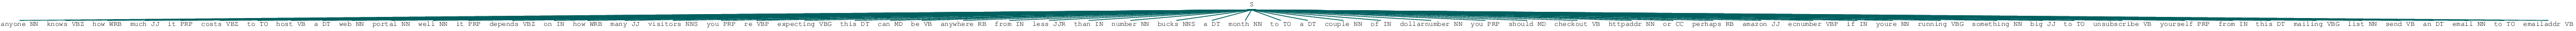

In [159]:
entities_email_contents

# Dataset examples from `sci-kit learn`

cf. [Non-linear SVM](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html#sphx-glr-auto-examples-svm-plot-svm-nonlinear-py)

In [139]:
X = np.random.randn(300,2)
y = np.logical_xor(X[:,0] > 0, X[:,1] > 0)

In [144]:
print(X.shape)
print(y.shape)
print(X.max())
print(X.min())
print(y.max()); print(y.min())

(300, 2)
(300,)
2.72723539114
-3.12203911067
True
False


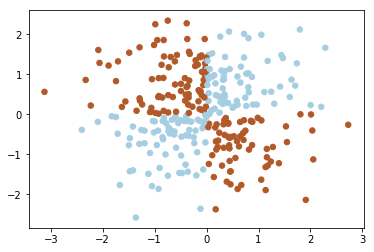

In [143]:
plt.scatter(X[:,0],X[:,1],s=30,c=y,cmap=plt.cm.Paired)

In [145]:
y = y.astype("int")

1
0


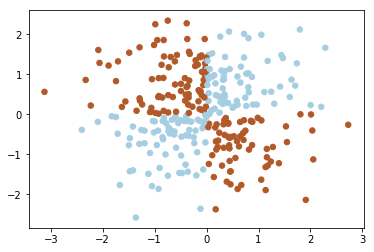

In [147]:
print(y.max());print(y.min())
plt.scatter(X[:,0],X[:,1],s=30,c=y,cmap=plt.cm.Paired)

cf. [SVM: Maximum margin separating hyperplane](http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py)

In [149]:
# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = [0] * 20 + [1] * 20 

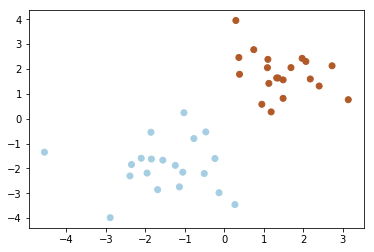

In [150]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)